### Writing down didaskalia (and other prerequisites)...

The two pairs of 2D points, $p_0, p_3$ and $p_1, p_2$ define a Bézier curve segment.
The curve has the following formula:
$$p(u) = p_0(1-u)^3 + 3p_1 (1-u)^2 u + 3p_2 u^2 (1-u) + p_3 u^3 $$
It starts at $p_0$ and ends at $p_3$. The internal points $p_1, p_2$ are called the control ones.


In [2]:
# https://matplotlib.org/stable/gallery/widgets/slider_demo.html
# https://www.pbr-book.org/4ed/Shapes/Curves

import matplotlib.pyplot as plt
from numpy import linspace as lp, outer
from matplotlib.widgets import Button, Slider

def bézier(p0, p1, p2, p3, n = 128):
    u = lp(0, 1, n)
    b = ( outer(P[0], (1 - u)**3)       + outer(P[1], 3*u * (1 - u)**2)
        + outer(P[2], 3*(1 - u) * u**2) + outer(P[3], u**3))
    return b

# Endpoints and control points: $p_0, p_1, p_2, p_3$
P = [[0, 0], [.25, -.5], [.75, .5], [1, 0]]
pp, cp = bézier(*P), tuple(zip(*P))

### Setting a stage...

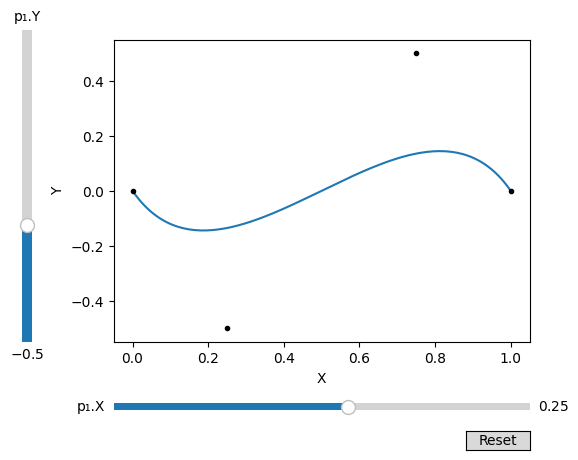

In [3]:
# Create the figure and the Bézier curve that we will manipulate
fig, ax = plt.subplots()
curve, points, = ax.plot(pp[0], pp[1], '-', cp[0], cp[1], 'k.')
ax.set_xlabel('X'), ax.set_ylabel('Y'),

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)
# Make a horizontal slider to control the p1.X
x_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03])
x_slider = Slider(
    ax=x_ax,
    label='p₁.X',
    valmin=-2,
    valmax=2,
    valinit=P[1][0],
    valstep=0.01
)
# Make a vertically oriented slider to control p1.Y
y_ax = fig.add_axes([0.1, 0.25, 0.03, 0.65])
y_slider = Slider(
    ax=y_ax,
    label='p₁.Y',
    valmin=-2,
    valmax=2,
    valinit=P[1][1],
    orientation="vertical",
    valstep=0.01
)

# The function to be called anytime a slider's value changes
def update(_):
    P[1][0], P[1][1] = x_slider.val, y_slider.val
    pp, cp = bézier(*P), tuple(zip(*P))

    curve.set_xdata(pp[0])
    curve.set_ydata(pp[1])

    points.set_xdata(cp[0])
    points.set_ydata(cp[1])

    fig.canvas.draw_idle()

# Register the update function with each slider
x_slider.on_changed(update)
y_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')

def reset(_):
    x_slider.reset()
    y_slider.reset()
button.on_clicked(reset)

plt.show() #... must go on!